[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/Linear_Regression_using_Tensorflow_methods.ipynb)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

In [0]:
iris = datasets.load_iris()

In [14]:
'''
iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
equation to solve : y = Ax+b
where x is the petal width and y is the sepal length
'''

'\niris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]\nequation to solve : y = Ax+b\nwhere x is the petal width and y is the sepal length\n'

In [0]:
x_vals = np.array([x[3] for x in iris.data]) # petal width
y_vals = np.array([x[0] for x in iris.data]) #sepal length


In [0]:
# we need a batch size

batch_size = 25

In [0]:
#placeholder for the data and target

x_data = tf.placeholder(shape = [None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

#We also need variables like A and b in our case here

A = tf.Variable(tf.random_normal(shape = [1,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))


In [0]:
#Model operations

model_output = tf.add((tf.matmul(x_data, A)), b)

#Loss function

l2_loss = tf.reduce_mean(tf.square(y_target - model_output))

In [0]:
#optimizer

my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(l2_loss)

#initialize the variables

init = tf.global_variables_initializer()
sess.run(init)


In [20]:
loss_vector = []

for i in range(1000):
    #sample as per random index
    rand_index = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(l2_loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vector.append(temp_loss)
    
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
    
    

Step #25 A = [[2.34237]] b = [[2.5913007]]
Loss = 1.0144306
Step #50 A = [[1.7711542]] b = [[3.465657]]
Loss = 0.5359219
Step #75 A = [[1.423761]] b = [[3.9814718]]
Loss = 0.558417
Step #100 A = [[1.2070905]] b = [[4.3078203]]
Loss = 0.30198285
Step #125 A = [[1.0880425]] b = [[4.507597]]
Loss = 0.21153334
Step #150 A = [[1.0064967]] b = [[4.6152673]]
Loss = 0.18788351
Step #175 A = [[0.91395944]] b = [[4.631683]]
Loss = 0.1477041
Step #200 A = [[0.9352536]] b = [[4.721365]]
Loss = 0.18652512
Step #225 A = [[0.89625907]] b = [[4.7320967]]
Loss = 0.13185547
Step #250 A = [[0.9223785]] b = [[4.795795]]
Loss = 0.3294193
Step #275 A = [[0.873888]] b = [[4.76685]]
Loss = 0.291084
Step #300 A = [[0.85589397]] b = [[4.7463593]]
Loss = 0.21633221
Step #325 A = [[0.89396]] b = [[4.779248]]
Loss = 0.21653606
Step #350 A = [[0.8710071]] b = [[4.795076]]
Loss = 0.21667017
Step #375 A = [[0.86467993]] b = [[4.7959995]]
Loss = 0.22252329
Step #400 A = [[0.84367716]] b = [[4.762362]]
Loss = 0.2405921

In [0]:
[slope] = sess.run(A)
[intercept] = sess.run(b)

#best fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

In [23]:
!pip install jupyterthemes

    100% |████████████████████████████████| 7.0MB 4.0MB/s 
    100% |████████████████████████████████| 51kB 16.6MB/s 
    100% |████████████████████████████████| 9.0MB 2.8MB/s 
    100% |████████████████████████████████| 51kB 18.1MB/s 
    100% |████████████████████████████████| 1.0MB 19.3MB/s 
  Running setup.py bdist_wheel for prometheus-client ... - done
  Stored in directory: /root/.cache/pip/wheels/04/6b/a4/4ccef2edcc797b5553edc6c8bed4d219dafdb019e225c2c348
Successfully built prometheus-client
  Found existing installation: pyzmq 16.0.4
    Uninstalling pyzmq-16.0.4:
      Successfully uninstalled pyzmq-16.0.4
  Found existing installation: notebook 5.2.2
    Uninstalling notebook-5.2.2:
      Successfully uninstalled notebook-5.2.2


In [0]:
from jupyterthemes import jtplot

jtplot.style()

jtplot.style(theme='solarizedd')

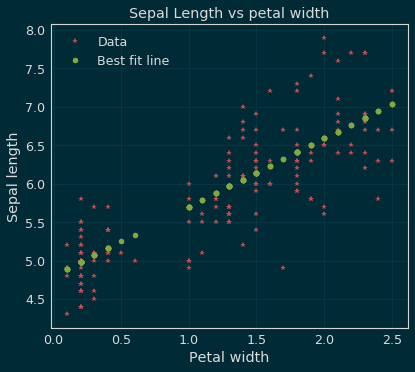

In [25]:
plt.plot(x_vals, y_vals, 'r*' , label = 'Data')
plt.plot(x_vals, best_fit, 'go', label = 'Best fit line', linewidth = 3)
plt.legend(loc = 'best')
plt.title('Sepal Length vs petal width')
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.show()